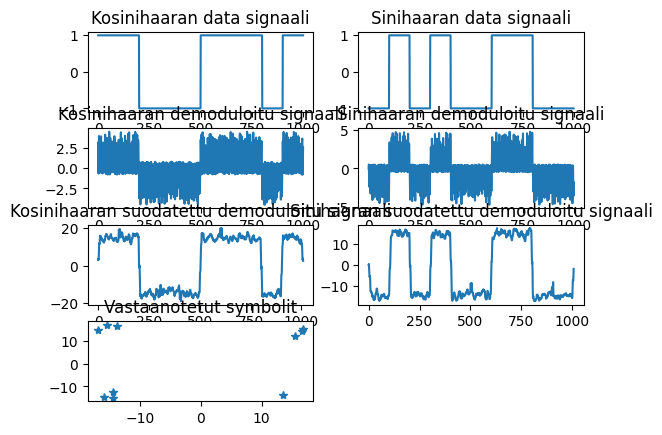

reaalihaaraan lähetettiin
[ 1.  1. -1. -1. -1.  1.  1.  1. -1.  1.]
ja reaalihaarasta vastaanotettiin
[ 14.88890529  15.02202549 -12.44032814 -13.7145542  -14.63966964
  16.65408959  14.36413397  12.15878434 -14.93145886  17.14848739]
bittipäätökset näistä:
[ 14.88890529  15.02202549 -12.44032814 -13.7145542  -14.63966964
  16.65408959  14.36413397  12.15878434 -14.93145886  17.14848739]
bitit:  [1. 1. 0. 0. 0. 1. 1. 1. 0. 1.]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def QPSK_modulate(Fs,fc,I_data,Q_data):
    Ts = 1/Fs
    samples = I_data.size
    t = np.arange(0,Ts*samples,Ts)          # start, stop, step
    cos_kantoaalto = np.cos(2*np.pi*fc*t)
    sin_kantoaalto = np.sin(2*np.pi*fc*t)
    moduloitu_I = (I_data*cos_kantoaalto)
    moduloitu_Q = (Q_data*sin_kantoaalto)
    moduloitu = moduloitu_I + moduloitu_Q

    #plt.figure(3)
    #plt.plot(moduloitu)
    #plt.show()
    return moduloitu

def QPSK_demodulate(Fs,fc,moduloitu,suodatin):
    Ts = 1/Fs
    samples = moduloitu.size
    t = np.arange(0,Ts*samples,Ts)          # start, stop, step
    cos_kantoaalto = np.cos(2*np.pi*fc*t)
    sin_kantoaalto = np.sin(2*np.pi*fc*t)
    demoduloitu_I = (moduloitu*cos_kantoaalto)
    demoduloitu_Q = (moduloitu*sin_kantoaalto)

    #Simuloidaan radiokanavan vaikutusta lisätään kohinaa
    demoduloitu_I = addNoise(demoduloitu_I,1)
    demoduloitu_Q = addNoise(demoduloitu_Q,1)
    #Ja käännetään signaalin vaihetta sillä vastaanottimen vaihetta ei tiedetä
    j = complex(0,1)
    vaihevirhe = complex(1,1)
    kompleksinen = demoduloitu_I + demoduloitu_Q*j
    kompleksinen = kompleksinen * vaihevirhe

    # Tehtävä opiskelijalle. Keksi kompleksilukuarvo, jolla
    # kanavan vaihevirhe korjaantuu.

    korjattuVaihe = complex(1,-1)
    kompleksinen = kompleksinen * korjattuVaihe

    demoduloitu_I = np.real(kompleksinen)
    demoduloitu_Q = np.imag(kompleksinen)

    suodatettu_I = np.convolve(demoduloitu_I,np.ones(suodatin,))
    suodatettu_Q = np.convolve(demoduloitu_Q,np.ones(suodatin,))
    return demoduloitu_I,demoduloitu_Q,suodatettu_I,suodatettu_Q


def makeRandomData(bits):
    #
    N = 100                    # NÄin monta näytettä / bitti
    Idata = np.zeros(bits*N,)
    Qdata = np.zeros(bits*N,)
    for I in range(bits):
        Idata[I*N:(I+1)*N] = (2*np.round(np.random.rand(1,))-1)*np.ones(N,)
        Qdata[I*N:(I+1)*N] = (2*np.round(np.random.rand(1,))-1)*np.ones(N,)

    return Idata,Qdata


def addNoise(signal,SNR):
    signalPower = np.average(np.power(signal,2))
    pituus = signal.size
    noise = signal/SNR
    return signal+noise*np.random.rand(pituus,)


if __name__ == '__main__':
    Idata,Qdata = makeRandomData(10)
    #print(Idata)
    Fs = 1000
    fc = 100
    Sp = 10
    moduloitu = QPSK_modulate(Fs,fc,Idata,Qdata)
    #moduloitu = addNoise(moduloitu,1)
    I,Q,SI,SQ = QPSK_demodulate(Fs,fc,moduloitu,Sp)
    plt.subplot(4,2,1)
    plt.plot(Idata),plt.title('Kosinihaaran data signaali')
    plt.subplot(4,2,2)
    plt.plot(Qdata),plt.title('Sinihaaran data signaali')
    plt.subplot(4,2,3)
    plt.plot(I),plt.title('Kosinihaaran demoduloitu signaali')
    plt.subplot(4,2,4),plt.plot(Q),plt.title('Sinihaaran demoduloitu signaali')
    plt.subplot(4,2,5),plt.plot(SI),plt.title('Kosinihaaran suodatettu demoduloitu signaali')
    plt.subplot(4,2,6),plt.plot(SQ),plt.title('Sinihaaran suodatettu demoduloitu signaali')

    SB = SI[55:-1:100]
    CB = SQ[55:-1:100]


    plt.subplot(4,2,7),plt.plot(CB,SB,'*'),plt.title('Vastaanotetut symbolit')
    plt.show()

    print('reaalihaaraan lähetettiin')
    print(Idata[1:1000:100])
    print('ja reaalihaarasta vastaanotettiin')
    print(SI[55:1005:100])
    # Tehtävä opiskelijalle
    # Tee tähän koodi, joka osaa tehdä bittipäätökset reaalihaaran (SI) tuloksista.
 

    bitdecisions= SI[55:1005:100]
    print("bittipäätökset näistä:")    
    print(bitdecisions)
    bits = np.zeros(10)
    round=0
    for i in bitdecisions:
        if(i < 0):
            bits[round] = 0
        else:
            bits[round] = 1
        round = round+1
    print("bitit: ", bits)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

lahetettySymboli = complex(1,1)

kanavanImpulssivaste = complex(10,-0.2)

demoduloituSymboli = lahetettySymboli*kanavanImpulssivaste

'''
 Kanava kääntää vaihetta ja vaimentaa (tai vahvistaa) signaalin amplitudia
 Vaihe saadaan korjattua kanavan impulssivasteen kompleksikonjugaatilla kertoen
 Vihje: käytä np.conj komentoa

 Kanavan vaimennus saadaan kompensoitua jakamalla impulssivasteen itseisarvon neliöllä
 Vihje: käytä np.abs ja np.power komentoja

 Sinun tehtävänäsi on siis avata alla olevat kommentit ja kehittää oikea koodi ??? merkeillä
 merkattuihin kohtiin siten, että vaikka muuttelet miten tuota kanavan impulssivastetta, niin
 vaihe- ja amplitudikorjattu signaali palautuu aina lahetettySymboli muotoon.

'''

#Vaihekorjattu = demoduloituSymboli *???
#print("Vaihekorjattu signaali = ",Vaihekorjattu)

#AmplitudiKorjattu = Vaihekorjattu / ???
#print("Vaihe ja amplitudikorjattu signaali = ", AmplitudiKorjattu)

'''
Ja toisena tehtävänä tutkitaan miten MIMO signaali voidaan vastaanottaa.
Tarvitaan siis tieto millaista kanavaa pitkin signaali on edennyt:
- Antennista 1 antenniin 1 => kanavanImpulssivaste h11
- Antennista 1 antenniin 2 => kanavanImpulssivaste h12
- Antennista 2 antenniin 1 => kanavanImpulssivaste h21
- Antennista 2 antenniin 2 => kanavanImpulssivaste h22

Tiedetään vain se mitä on vastaanotettu eli demoduloidut symbolit
- Mitä on vastaanotettu antennista 1 => r1
- Mitä on vastaanotettu antennista 2 => r2

Halutaan tietää mitä on lähetetty:
- Antennista 1 => s1
- Antennista 2 => s2

Lähetetään antennista 1 symboli 1+j ja antennista 2 2+2j,
Keksitään kanavan impulssivasteet ja lasketaan vastaanotetut symbolit, jotka
sitten korjataan (tai ratkaistaan yhtälöparista)
'''

l1 = complex(1,1)
l2 = complex(2,2)
h11 = complex(np.random.randn(1),np.random.randn(1))  # alustetaan kanava satunnaisesti
h12 = complex(np.random.randn(1),np.random.randn(1))  # alustetaan kanava satunnaisesti
h21 = complex(np.random.randn(1),np.random.randn(1))  # alustetaan kanava satunnaisesti
h22 = complex(np.random.randn(1),np.random.randn(1))  # alustetaan kanava satunnaisesti
#h11 = complex(1,1)
#h12 = complex(0.5,0.5)
#h21 = complex(-0.5,-0.5)
#h22 = complex(1,0.2)


# Laitetaan kaikki matriisimuotoon

L = np.array([[l1],[l2]])

print("lähetetty = ", L)

H = np.array([[h11,h12],[h21,h22]])
print("kanavamatriisi = ", H)

iH = np.linalg.inv(H)
print("käännetty kanavamatriisi = ", iH)

R = np.matmul(H,L)
print("Kanavalta vastaanotetaan = ", R)

K = np.matmul(iH,R)
print("kanavamatriisilla korjattu = ", K)




lähetetty =  [[1.+1.j]
 [2.+2.j]]
kanavamatriisi =  [[ 1.02303009-1.30259035j -0.66548555-1.03680147j]
 [-0.26354699+1.52370399j  0.07324396+0.12914919j]]
käännetty kanavamatriisi =  [[-0.00357542-0.08725427j -0.06923488-0.72131313j]
 [-0.547675  +0.72612217j -0.88546774+0.40619049j]]
Kanavalta vastaanotetaan =  [[ 3.06825227-3.6841343j ]
 [-1.89906144+1.66494329j]]
kanavamatriisilla korjattu =  [[1.+1.j]
 [2.+2.j]]


C:\Users\artop\AppData\Local\Temp\ipykernel_26264\3210242253.py:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  h11 = complex(np.random.randn(1),np.random.randn(1))  # alustetaan kanava satunnaisesti
C:\Users\artop\AppData\Local\Temp\ipykernel_26264\3210242253.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  h12 = complex(np.random.randn(1),np.random.randn(1))  # alustetaan kanava satunnaisesti
C:\Users\artop\AppData\Local\Temp\ipykernel_26264\3210242253.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before perfo

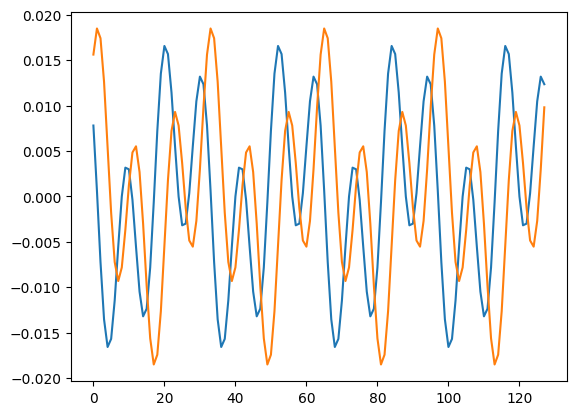

(0, 1)
(0, 1)
bittitutkinta ei välttämättä toimi oikein vielä.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
def decide(vaihe):
    if vaihe > 0 and vaihe <= np.pi/2:
       bits = (0,1)
    elif vaihe > np.pi/2 and vaihe <= np.pi:
        bits = (0,0)
    elif vaihe > -np.pi and vaihe <= -np.pi/2:
        bits = (1,0)
    else:
        bits = (1,1)
    return bits


taajuustaso = np.zeros(128, dtype=complex)

taajuustaso[4]=complex(0,1)

taajuustaso[12]=complex(1,1)

aikataso = np.fft.ifft(taajuustaso)

plt.plot(np.real(aikataso))
plt.plot(np.imag(aikataso))
plt.show()

taajuust = np.fft.fft(aikataso)


# Lisätään taajuudet komponenttiin

komponentti = (taajuust[4], taajuust[12])

# Printataan komponentit

for i in komponentti:
    I = np.real(i)
    Q = np.imag(i)
    vaihe = np.arctan2(Q, I)
    bits=decide(vaihe)
    print(bits)


print("bittitutkinta ei välttämättä toimi oikein vielä.")

